In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Experiment-01

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset_altered = dataset.drop(columns=['Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction'])

# Experiment-02

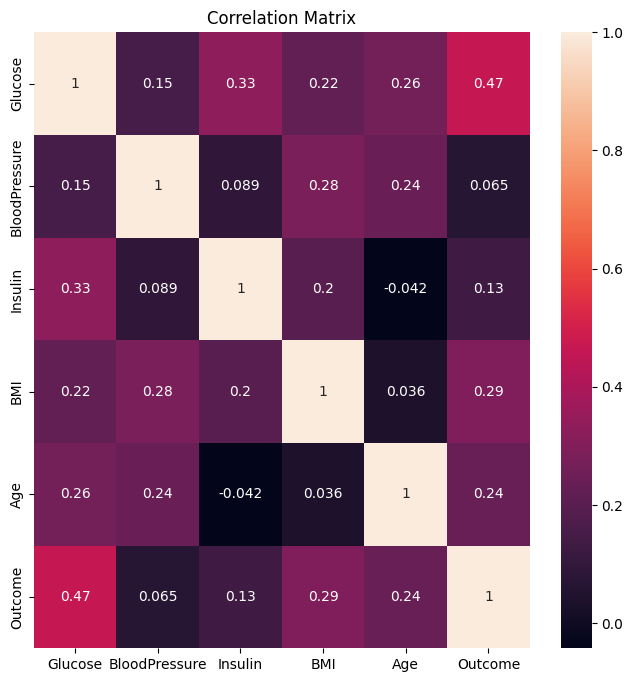

In [3]:
corr = dataset_altered.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Experiment-03

In [4]:
X = dataset_altered.iloc[:, :-1].values
y = dataset_altered.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Closed form Linear Regression

class linear_regression_closed:
    def __init__(self):
        self.weight = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.weight = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.weight

Percent accuracy: 71.0%


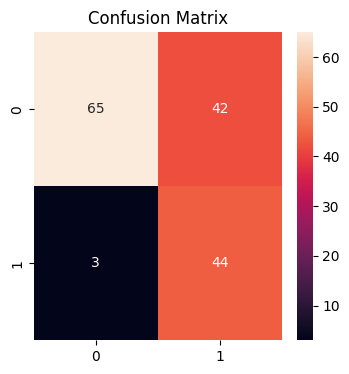

In [6]:
closed_form_lr = linear_regression_closed()
closed_form_lr.fit(X_train, y_train)
y_pred = closed_form_lr.predict(X_test)

y_pred_class = np.array([1 if i > 0.29 else 0 for i in y_pred])
print("Percent accuracy: {}%".format(accuracy_score(y_test, y_pred_class).round(2)*100))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

# Experiment-04

In [7]:
# Gradient Descent Linear Regression with L2 Regularization

class linear_regression_gradient:
    def __init__(self, learning_rate=0.01, epochs=1000, lmbda=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight = None
        self.bias = None
        self.lmbda = lmbda  # Regularization parameter

    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
        self.bias = 0
        n = X.shape[0]
        for _ in range(self.epochs):
            y_pred = X @ self.weight + self.bias
            d_weight = (-2/n) * (X.T @ (y - y_pred)) + (self.lmbda / n) * self.weight
            d_bias = (-2/n) * np.sum(y - y_pred)
            self.weight = self.weight - self.learning_rate * d_weight
            self.bias = self.bias - self.learning_rate * d_bias

    def predict(self, X):
        return (X @ self.weight)

Best learning rate:  0.001


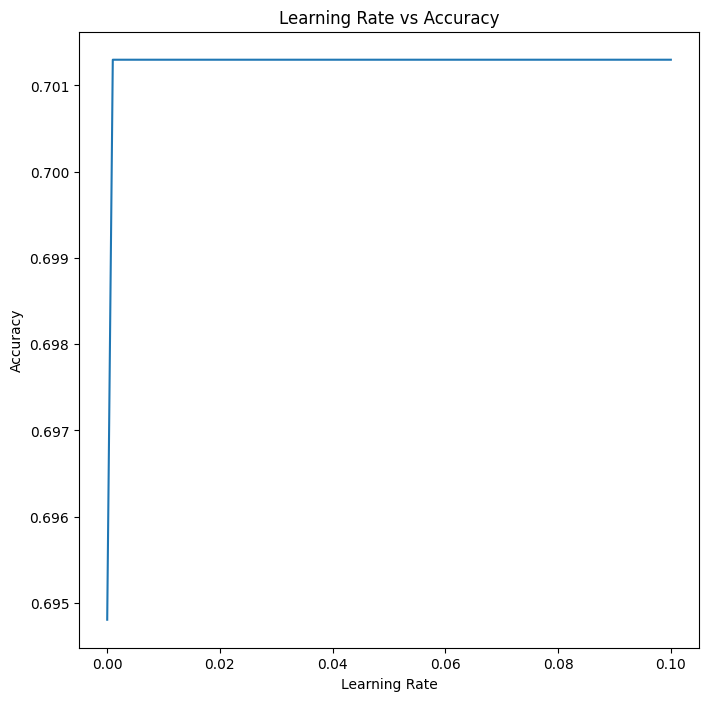

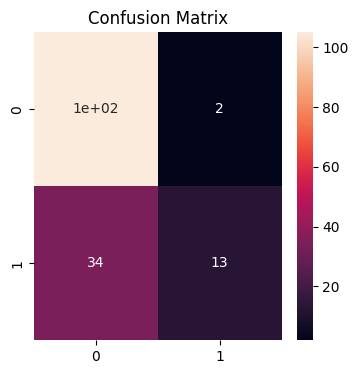

Percent accuracy: 77.0%


In [8]:
learning_rates = [0.00001, 0.001, 0.05, 0.1]
accuracies = []

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

for lr in learning_rates:
    gradient_descent_lr = linear_regression_gradient(learning_rate=lr)
    gradient_descent_lr.fit(X_train, y_train)
    y_pred_gd = gradient_descent_lr.predict(X_test)
    y_pred_gd_class = np.array([1 if i > 0.5 else 0 for i in y_pred_gd])
    accuracies.append(accuracy_score(y_test, y_pred_gd_class))
    

best_lr = learning_rates[np.argmax(accuracies)]
print("Best learning rate: ", best_lr)

plt.figure(figsize=(8, 8))
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.show()

gradient_descent_lr = linear_regression_gradient(learning_rate=best_lr)
gradient_descent_lr.fit(X_train, y_train)
y_pred_gd = gradient_descent_lr.predict(X_test)
y_pred_gd_class = np.array([1 if i > 0.29 else 0 for i in y_pred_gd])
cm = confusion_matrix(y_test, y_pred_gd_class)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

print("Percent accuracy: {}%".format(accuracy_score(y_test, y_pred_gd_class).round(2)*100))

In [9]:
gradient_descent_lr = linear_regression_gradient(learning_rate=best_lr, lmbda=0.1)
gradient_descent_lr.fit(X_train, y_train)
y_pred_gd = gradient_descent_lr.predict(X_test)

In [13]:
print("Percent accuracy: {}%".format(accuracy_score(y_test, y_pred_gd_class).round(2)*100))

Percent accuracy: 77.0%
